## Unit 2 - Time-Independent Schrödinger Equation

<a href="https://colab.research.google.com/github/uqglmn/qm/blob/main/QM_Problem_27.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Problem 2.7

A particle in the infinite square well has the initial wave function:
$$
\Psi(x,0) = \begin{cases} 
A\,x     & 0 \le x \le a/2 \\
A\,(a-x) & a/2 \le x \le a
\end{cases}
$$

where $a$ and $A$ are positive real constants.

(a) Sketch $\Psi(x,0)$ and determine $A$.

(b) Find $\Psi(x,t)$.

(c) What is the probability that a measurement of the energy would yield the value $E_1$?

(d) Find the expectation value of the energy, using $\langle \hat H \rangle = \sum_n |c_n|^2 E_n$.

### Solution

#### Load SymPy and variables

In [1]:
import sympy as sym

In [2]:
a, A, m, h = sym.symbols("a A m hbar", positive=True, real=True)
n = sym.symbols("n", positive=True, integer=True)
x = sym.symbols("x", real=True)

In [3]:
sym.init_printing(use_unicode=True)

#### Solution to (a)

Sketching $\Psi(x,0)$ with $A=a=1$:

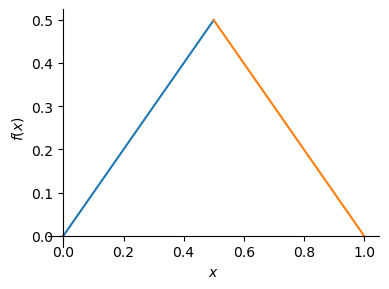

In [4]:
na = 1
p1 = sym.plotting.plot(x, (x,0,1/2), show=False, size=(4,3))
p2 = sym.plotting.plot((1-x), (x,1/2,1), show=False)
p1.extend(p2)
p1.show()

We must have
$$
\int_{-\infty}^{+\infty}|\Psi(x,0)|^2 dx = \int_{0}^{a/2}|A\,x|^2 dx + \int_{a/2}^{a}|A\,(a-x)|^2 dx = 1
$$
The first integral is:

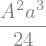

In [5]:
int1 = sym.integrate((A*x)**2, (x,0,a/2))
int1

The second integral is:

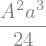

In [6]:
int2 = sym.simplify(sym.integrate((A*(a-x))**2, (x,a/2,a)))
int2

This gives
$$
\frac{A^2a^3}{24} + \frac{A^2a^3}{24} = 1 
\quad \Longrightarrow\quad A = \frac{2\sqrt{3}}{\sqrt{a^3}}
$$
Let's repeat this with SymPy:

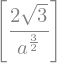

In [7]:
sym.solve(int1 + int2 - 1, A)

Answer: $A = \frac{2\sqrt{3}}{\sqrt{a^3}}$ since $A$ is a positive real constant.

#### Solution to (b)


The general solution to TDSE is

$$
\Psi(x,t) = \sum_{n=1}^\infty c_n \psi_n(x) e^{-i E_m t / \hbar}
$$

where

$$
c_n = \int_{-\infty}^{+\infty} \psi_n^*(x) \Psi(x,0) dx = \int_{0}^{a/2} \sqrt{\frac{2}{a}} \sin\frac{n\pi x}{a} A x dx + \int_{a/2}^{a} \sqrt{\frac{2}{a}} \sin\frac{n\pi x}{a} A(a-x) dx
$$


Stationary states:

In [8]:
ψn = sym.sqrt(2/a) * sym.sin( n*sym.pi*x / a )
A  = 2*sym.sqrt(3/a**3)

The wanted integrals are:

In [9]:
int1 = sym.integrate( ψn*A*x, (x,0,a/2))
int2 = sym.integrate( ψn*A*(a-x), (x,a/2,a))

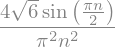

In [10]:
cn = sym.simplify(int1 + int2)
cn

Observe that $\sin(\pi n/2)=0$ if $n$ is even and $\sin(\pi n/2)=(-1)^{(n-1)/2}$ if $n$ is odd. 

Therefore:

$$
c_n = \begin{cases} 0 & \text{ if $n$ is even} \\ (-1)^{(n-1)/2}\dfrac{4\sqrt{6}}{\pi^2 n^2} & \text{if $n$ is odd} \end{cases}
$$

#### Solution to (c)

The probability to measure $E_1$ is 

$$
P_1 = |c_1|^2 = \bigg|\frac{4\sqrt{6}}{\pi^2}\bigg|^2 = \frac{96}{\pi^4} \approx 0.9855
$$

In [11]:
P1 = (cn**2).subs({n:1})
P1

In [12]:
# evaluate numerically
sym.N(P1,4)

#### Solution to (d)

The expectation value of the energy is:

$$
\langle \hat H \rangle = \sum_{n=1}^{\infty} |c_n|^2 E_n = \sum_{n=1}^{\infty} |c_{2n-1}|^2 E_{2n-1}
$$

since $c_{2n}=0$.

In [13]:
# level-n energy (with 2n-1 levels)
En = ((2*n-1)**2 * sym.pi**2 * h**2) / (2 * m * a**2)
cn = (-1)**(n-1) * 4 * sym.sqrt(6) / ((2*n-1)**2 * sym.pi**2 )

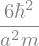

In [14]:
# evaluate the infinite sum
sym.Sum(cn*cn*En, (n,1,sym.oo)).doit()

---